# Introduction
Une méthode largement reconnue pour évaluer les effets environnementaux d'un produit tout au long de sa vie est la méthode de l'analyse du cycle de vie (ACV). Cette méthode évalue les impacts environnementaux d'un produit depuis l'extraction et la transformation des matières premières jusqu'à son recyclage ou son élimination.  

Les études d'ACV reposent généralement sur de grandes bases de données (par exemple, la base de données GaBi, Ecoinvent), compilées par des experts dans le domaine, qui contiennent l'impact environnemental de divers composants et processus du produit. Les calculs de l'impact de toutes les charges environnementales associées à un produit peuvent ensuite être effectués à l'aide d'une simple feuille de calcul ou d'outils et de solutions logicielles d'ACV (par exemple GaBi et SimaPro).  

La méthode ACV est de plus en plus utilisée pour l'étiquetage des produits et les déclarations environnementales des produits (EPD). Toutefois, les procédures d'ACV étant complexes, longues et coûteuses, il est difficile d'utiliser cette méthode pour attribuer rapidement une note globale de durabilité environnementale aux produits.  

Par conséquent, il existe de nombreux labels environnementaux différents qui ne prennent en compte que certains aspects du cycle de vie, au lieu d'avoir un label unique qui reflète l'impact environnemental global des produits tout au long de leur cycle de vie.  

Ainsi, avec ce projet, **nous espérons créer un modèle de classification par apprentissage supervisé capable de classer l'impact environnemental d'un vêtement en fonction de sa composition, de sa fabrication et de sa consommation. Ce modèle pourrait être utilisé par les marques dans leurs étiquettes comme un label de qualité environnementale de leurs produits**.

# Dataset
* [Clothing Products Dataset](https://doi.org/10.14428/DVN/5CJZHI)
* Autrice : Satinet, Chloé, 2022
* Source : Open Data @ UCLouvain

Nous avons décidés de travailler avec ce jeu de données car il a été prétraitée par son autrice qui a recueilli les informationd sur l'analyse du cycle de vie (ACV) de différents produits.  

Les sources originales de cette base de données proviennent de la base de données Open Source du système international EPD, de la marque de denim certifiée durable et équitable "MUD Jeans", basée aux Pays-Bas, qui a accepté de partager les résultats des ACV réalisées pour 75 de ses produits, d'études fournies par différents chercheurs et organisations et du site de commerce électronique "Reformation" et d'un deuxième revendeur en ligne populaire à l'aide de la bibliothèque Python Beautiful Soup.  

Lorsque les valeurs de certains produits étaient manquantes pour certaines variables, l'autrice les a déduit à partir d'observations présentant des valeurs similaires pour les autres variables ou elle ne les a pas comblés, en fonction des données manquantes.  

En ce qui concerne le lieu d'utilisation d'un produit, l'autrice a sélectionné au hasard un pays faisant partie du revendeur en ligne du produit, afin de générer une variété de distances de transport représentatives de la réalité.   

Elle a obtenu ainsi un **ensemble de données contenant 1136 produits vestimentaires avec des données complètes sur les attributs du produit et les données correspondantes sur l'impact environnemental total sur une échelle de 1 à 5**.  


# Importation des librairies

In [12]:
# -*- coding: utf-8 -*-
from flask import Flask, render_template

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split

In [13]:
# -*- coding: utf-8 -*-


app = Flask(__name__)

# Importation du jeu de données

In [14]:
# -*- coding: utf-8 -*-

df = pd.read_excel("database/Full Dataset.xlsx")
df.head()

,ID,Type,Cotton,Organic_cotton,Linen,Hemp,Jute,Other_plant,Silk,Wool,...,Chemicals_label,Production_label,Manufacturing_location,Transporation_distance,Use_location,Washing_instruction,Drying_instruction,Reusability_label,Recylability_label,EI
0,1,jeans,0.4,0.6,0.0,0.0,0,0,0.0,0.0,...,0,1,Africa,2072.0,Netherlands,Machine wash_ cold,Line dry,1,1,1
1,2,jeans,0.4,0.6,0.0,0.0,0,0,0.0,0.0,...,0,1,Africa,2389.0,Germany,Machine wash_ cold,Line dry,1,1,1
2,3,jeans,0.4,0.6,0.0,0.0,0,0,0.0,0.0,...,0,1,Africa,2262.0,Belgium,Machine wash_ cold,Line dry,1,1,1
3,4,jacket,0.4,0.6,0.0,0.0,0,0,0.0,0.0,...,0,1,Africa,2728.0,France,Machine wash_ cold,Line dry,1,1,1
4,5,jacket,0.4,0.6,0.0,0.0,0,0,0.0,0.0,...,0,1,Africa,2887.0,Austria,Machine wash_ cold,Line dry,1,1,1


# Traitement du jeu de données

Regardons le nombre de lignes et de colonnes dans notre jeu de données :

In [15]:
# -*- coding: utf-8 -*-

print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

Nombre de lignes : 1136
Nombre de colonnes : 43


Regardons les informations générales, telles que les noms des colonnes, leurs types et le nombre de données non-nulles :

In [16]:
# -*- coding: utf-8 -*-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1136 non-null   int64  
 1   Type                    1136 non-null   object 
 2   Cotton                  1136 non-null   float64
 3   Organic_cotton          1136 non-null   float64
 4   Linen                   1136 non-null   float64
 5   Hemp                    1136 non-null   float64
 6   Jute                    1136 non-null   int64  
 7   Other_plant             1136 non-null   int64  
 8   Silk                    1136 non-null   float64
 9   Wool                    1136 non-null   float64
 10  Leather                 1136 non-null   float64
 11  Camel                   1136 non-null   int64  
 12  Cashmere                1136 non-null   int64  
 13  Alpaca                  1136 non-null   int64  
 14  Feathers                1136 non-null   

**Nous avons une colonne qui indique le type de vêtement dont il s'agit, des données sur la quantité de chaque matériel pour ce vêtement, des labels selon l'ACP de ce produit tels que production, toxicité (chemicals), réutilisabilité et recyclabilité, le local de fabrication et d'utilisation, la distance entre ces deux derniers et finalement la classification environnementale (EI - Environmental Impact)**.  

`Manufacturing_location` est la seule colonne avec des données manquantes. Regardons pour combien d'observations :

In [17]:
# -*- coding: utf-8 -*-

df.isna().sum().sum()

836

Puisque les données manquantes représentent une grande partie de notre ensemble de données, et sachant que nous avons la colonne `Transporation_distance` qui est finalement plus significative que les lieux de fabrication et d'utilisation du produit, **nous allons supprimer les colonnes `Manufacturing_location` et `Use_location`**. Puisque la **colonne `ID`** correspond à l'index, nous allons la supprimer également :

In [18]:
# -*- coding: utf-8 -*-

df.drop(['ID', 'Manufacturing_location', 'Use_location'], axis=1, inplace=True)

Regardons maintenant quelques inforamtions statistiques de chaque colonne numérique (moyenne, écart-type, minimum, maximum, intercartilles, count) :

In [19]:
# -*- coding: utf-8 -*-

df.describe()

,Cotton,Organic_cotton,Linen,Hemp,Jute,Other_plant,Silk,Wool,Leather,Camel,...,Other,Recycled_content,Reused_content,Material_label,Chemicals_label,Production_label,Transporation_distance,Reusability_label,Recylability_label,EI
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.0,1136.0,1136.000000,1136.000000,1136.000000,1136.0,...,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1.136000e+03,1136.000000,1136.000000,1136.000000
mean,0.416444,0.104674,0.002896,0.000202,0.0,0.0,0.005370,0.011127,0.006162,0.0,...,0.001197,0.047069,0.039833,0.327465,0.039613,0.088028,8.416133e+11,0.065141,0.072183,3.384683
std,0.428725,0.254373,0.039812,0.006824,0.0,0.0,0.072569,0.071690,0.069338,0.0,...,0.030069,0.143838,0.136055,0.469495,0.195133,0.283461,2.836624e+13,0.246883,0.258905,1.122809
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.475500e+03,0.000000,0.000000,3.000000
50%,0.280000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.137300e+04,0.000000,0.000000,4.000000
75%,0.950000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.627800e+04,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,0.230000,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.560727e+14,1.000000,1.000000,5.000000


**On voit ici que les valeurs minimum des données correspondantes au matériel eu et aux Labels sont égales à 0 et leur maximum égales à 1 : il s'agit donc de pourcentages. Le label environnemental varie bien de 1 à 5.**  

La seule variable qualitative de notre ensemble de données sont les variables `Type`, qui nous indique de quelle catégorie de vêtements il s'agit, `Washing_instruction` et `Drying_instruction`. Regardons les graphiques à barres pour avoir une idée de la distribution de ces données :

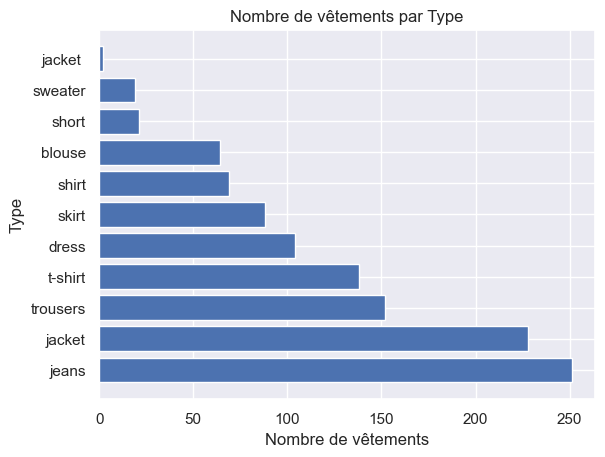

In [20]:
# -*- coding: utf-8 -*-

#Fonction pour afficher un graphique en barres horizontales :


def bar_h(df,X) :
    # Compter le nombre de chaque type de vêtement
    counts = df[X].value_counts()
    # Créer un graphique en barres horizontales
    plt.barh(counts.index, counts.values)
    # Ajouter des étiquettes et un titre
    plt.xlabel('Nombre de vêtements')
    plt.ylabel(f'{X}')
    plt.title(f'Nombre de vêtements par {X}')
    # Afficher le graphique
    plt.savefig('static/bar_h.png')
    #return plt.show()

bar_h(df,'Type')

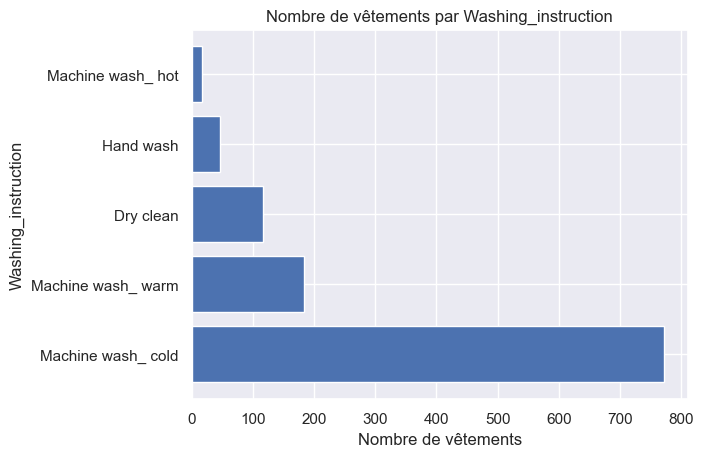

In [21]:
# -*- coding: utf-8 -*-

bar_h(df,'Washing_instruction')

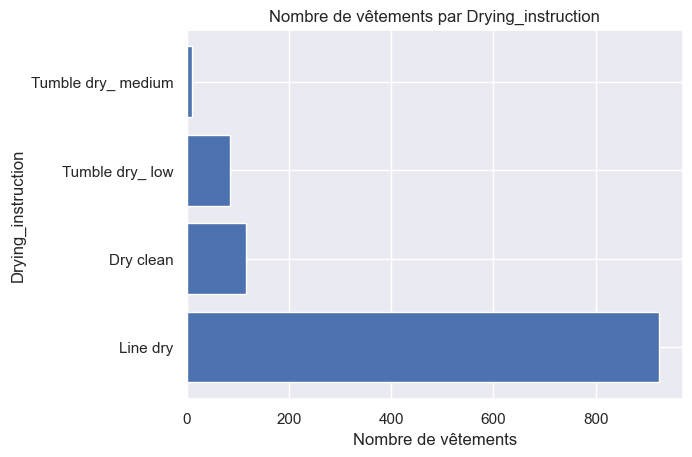

In [22]:
# -*- coding: utf-8 -*-

bar_h(df,'Drying_instruction')

Ces variables qualitatives n'ont pas d'impact significatif sur l'impact environnemental du vêtement : le type de lavage est une conséquence plutôt de la composition générale des matériaux de fabrication d'une pièce, et le type de vêtement n'est qu'une classification qui n'a pas de corrélation directe avec la variable qu'on cherche à expliquer.  
Ainsi, **nous n'allons pas utiliser les variables qualitatives pour notre modèle de Machine Learning**. Cela nous évite également de passer par un processus d'encodage via le module OneHot Encoder de Scikit-Learn, pour les variables non ordinales, et Label Encoding pour les variables ordinales.  

Regardons le colonnes `Recycled_content`, `Recylability_label`, `Reused_content`, `Reusability_label` et `Material_label` :

In [23]:
# -*- coding: utf-8 -*-

df['Recycled_content'].value_counts()

Recycled_content
0.00    998
0.33     42
0.20     35
0.40     29
0.70     14
0.65      7
1.00      5
0.41      3
0.15      1
0.11      1
0.17      1
Name: count, dtype: int64

In [24]:
# -*- coding: utf-8 -*-

df['Recylability_label'].value_counts()

Recylability_label
0    1054
1      82
Name: count, dtype: int64

In [25]:
# -*- coding: utf-8 -*-

df['Reused_content'].value_counts()

Reused_content
0.00    1029
0.25      50
0.50      41
0.75      15
1.00       1
Name: count, dtype: int64

In [26]:
# -*- coding: utf-8 -*-

df['Reusability_label'].value_counts()

Reusability_label
0    1062
1      74
Name: count, dtype: int64

In [27]:
# -*- coding: utf-8 -*-

df['Material_label'].value_counts()

Material_label
0    764
1    372
Name: count, dtype: int64

Nous pouvons constater que la plupart des vêtements ne contiennent aucun matériau recyclé lors de leur fabrication et qu'ils ne peuvent pas non plus être réutilisés.  
Regardons maintenat notre **variable à expliquer**, l'impact environnemental (`EI` - Environmental Impact) :

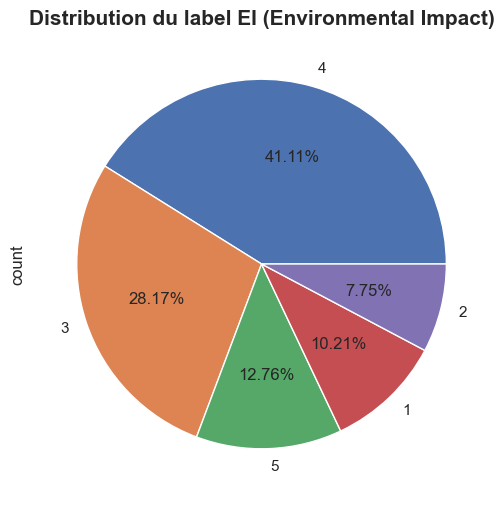

In [28]:
# -*- coding: utf-8 -*-

plt.figure(figsize=(6,6))
df['EI'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Distribution du label EI (Environmental Impact)', fontweight='bold', fontsize=15)
plt.show()

Il s'agit d'une étiquette allant de 1 à 5 selon l'impact environnemental du produit. La plupart des vêtements de notre base de données ont une classification entre 3 et 5, c'est-à-dire, sont dans une catégorie de grand impact environnemental.  

Examinons la matrice de corrélation, qui nous donne les R-carrés ou les coefficients de détermination entre les variables, pour voir si nous pouvons en tirer des conclusions significatives :

In [29]:
# -*- coding: utf-8 -*-

#matrice de correlation
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='rocket_r', linewidths=1, linecolor='white')
plt.title("Matrice des corrélations", fontsize=18, fontweight='bold')
plt.show()

ValueError: could not convert string to float: 'jeans'

Nous pouvons voir que **l'étiquette de l'impact environnemental (`EI`) augmente en fonction de l'impact négatif : plus elle est grande, moins l'entreprise est éco-responsable**.  <br>
Nous pouvons voir que **le pourcentage de coton biologique (`cotton_organique`) est négativement corrélé à l'`IE`, ainsi que toutes les variables `label`**. <br>Comme cet ensemble de données provient d'une étude antérieure dans laquelle l'une des variables d'une paire de variables explicatives fortement corrélées entre elles a été supprimée, nous n'avons pas besoin de le faire pour que notre modèle ne soit pas biaisé.  

Nous avons une quantité importante de variables. Avant de créer un modéle d'apprentissage supervisé, il faut que nous regardions s'il est possible de diminuer le nombre de variables initiales pour obtenir un un espace de dimension réduite en perdant le moins possible d'informations. Pour ça, nous allons appliquer une ACP.  

Le premier pas, tout d'abord, est de **diviser notre jeu de données en variables explicatives, variable à expliquer, en d'entraînement et jeu de test**.

# Data Split

D'un coté X la matrice des données (**variables explicatives**) :

In [ ]:
# -*- coding: utf-8 -*-

#créer une copie du df en ne conservant que les colonnes numériques :
df = df.select_dtypes(include=['float64', 'int64'])

#matrice X
X = df.iloc[:, :-1].values

#nom des variables à expliquer
features = df.iloc[:, :-1].columns
features

Nous enregistrons les différentes catégories de la **variable à expliquer** dans une nouvelle variable, y :

In [ ]:
y = df['EI']
y

On découpe nos données en **jeu d'entraînement et jeu de test (20% du total)** :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

On va **centrer-réduire** nos données :

In [ ]:
scaler = preprocessing.StandardScaler()
std_scale = scaler.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

On confirme que la moyenne est à 0 et l'écart-type à 1, c'est-à-dire, que nos données sont bien centrées-réduites :

In [ ]:
pd.DataFrame(X_train_std).describe().round(2).iloc[1:3:, : ]

# ACP : Analyse par composantes principales

L'**ACP** ou **PCA** (pour Principal Component Analysis) a deux objectifs principaux. Elle permet d'étudier :

* La **variabilité entre les individus**, c'est-à-dire quelles sont les différences et les ressemblances entre individus ;

* Les **liaisons entre les variables** : y a-t-il des groupes de variables très corrélées entre elles, qui peuvent être regroupées en de nouvelles variables synthétiques ?

Pour savoir **combien de composantes principales étudier**, il faut créer un diagramme d’éboulis des valeurs propres.  
En ACP, quand on projette les données sur les axes principaux d’inertie, ceux-ci sont ordonnés selon l’inertie du nuage de points projeté : de la plus grande à la plus petite. Quand on additionne les inerties associées à tous les axes, on obtient l’inertie totale du nuage des individus. L’éboulis des valeurs propres est donc ce diagramme qui décrit le pourcentage d’inertie totale associé à chaque axe. On peut également afficher la somme cumulée des inerties, une courbe qui part de l’origine et qui arrive à 100 % après avoir parcouru tous les axes.  
Nous allons travailler ici sur les 10 premières composantes :

In [ ]:
#définir le nombre de composantes principales
n_components = 10

# On instancie notre ACP :
pca = PCA(n_components=n_components)

# On l'entraîne et transforme sur les données :
pca.fit(X_train_std)
df_pca = pca.transform(X_train_std)

Intéressons nous maintenant à la variance captée par chaque nouvelle composante :

In [ ]:
pca.explained_variance_ratio_

Ici, on voit que la 1ère composante capte presque 13% de la variance de nos données initiales, la 2ème 6.71%, etc etc. Nous pouvons voir cela dans notre **éboulis des valeurs propres** :

In [ ]:
#variances par composantes principales
scree = (pca.explained_variance_ratio_*100).round(2)

#variances cumulées 
scree_cum = scree.cumsum().round()

#liste avec composantes
x_list = range(1, n_components+1)

#éboulis des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée. On voit ici qu'on a que'environ 55% de la variance expliquée par les 10 premières composantes. Cela nous indique que toutes nos variables doivent être comprises dans notre modèle. Nous pouvons voir la contribution de chaque variable à chaque axe principal d'inertie par la table ci-dessus :

In [ ]:
pcs = pd.DataFrame(pca.components_)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
pcs.T

Répresentons cela par un heatmap :

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

E finalement par un **cercle de corrélations**, qui nous permet d'étudier la liaison entre les variables qui définissent l'impact environnemental d'un vêtement selon les plans principaux d'inertie. Créons notre cercle des corrélations pour F1 et F2 :

In [ ]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    
# définition des axes x et y (2 premières composantes) : 
x_y = (0,1)
x_y

# graphique 
correlation_graph(pca, x_y, features)

Et pour F2 et F3 :

In [ ]:
correlation_graph(pca, (1,2), features)

**On constate qu'il est effectivement difficile de retirer des conclusions sur un possible résumé de nos données. Toutes les varibales étant importantes, nous n'allons pas obtenir un un espace de dimension réduite.**  

**Notre but étant d'effectuer une tâche de classification, vous pouvons essayer d'utiliser un algorithme différent qui pourrait être mieux adapté à nos données, comme les forêts aléatoires ou les réseaux de neurones.**  

**Nous allons commencer par un algorithme d'arbre de décisions, pour après appliquer une forêt aléatoire et évaluer la performance de chaque algorithme.**  

# Arbre de décisions

**Un arbre de décisions est un algorithme d'apprentissage supervisé non paramétrique, qui est utilisé à la fois pour les tâches de classification et régression**. Il a une **structure hiérarchique**, une structure arborescente, qui se compose d'un noeud racine, de branches, de nœuds interne et de noeuds feuille.

Pour la classification,  à chacune de ces itérations, l'algorithme d'entraînement va rajouter la décision qu'il lui semble le mieux de rajouter. Pour ce faire, il va  tester et évaluer la qualité de toutes les nouvelles décisions qu'il est possible d'ajouter à l'arbre en calculant le score Gini. Le score Gini est un score qui a été spécialement inventé afin de réaliser la sélection des nouvelles branches dans un arbre de décision.

Le score "Gini", est compris entre zéro et 1.  Il s'agit d'une valeur numérique indiquant la probabilité que l' arbre se trompe lors de la prise d'une décision (par exemple qu'il choisit la classe "A" alors que la vraie classe c'est "B") - si le jeu de données était libellé qie sur la base de la distribution de ses classes. Une branche sera rajoutée à l'arbre si parmi toutes les branches qu'il est possible de créer cette dernière présente le score Gini maximal. 

Le process complet de construction d'un arbre de décision, est, donc : 

   1- À l'initialisation, l'arbre est totalement vide.

   2- Le score de toutes les décisions qu'il est possible de prendre  est calculé. 

   3- La décision qui présente le score Gini maximal est choisie comme racine

   4-Tant qu'il est possible de faire un split et que le critère d'arrêt n'est pas respecté :

            5- Pour chaque décision qu'il est possible d'ajouter à l'arbre; Faire 6.

                             6- Calcul du score Gini de la décision courante 

            7-Sélection de la décision admettant le score max et ajout de celle-ci à l'arbre 

  
Nous allons faire appel à la bibliothèque scikit-learn pour entraîner un modèle d'arbre de décisions sur notre jeu de données. Pour choisir les meilleurs paramètres à utiliser dans notre modèle, nous allons utiliser la validation croisée à travers GridSearchCV :

In [ ]:
# Tester des différents paramètres min_samples_leaf
param_grid = {'min_samples_leaf': range(5, 100, 5)}

# Instancier le classifieur d'arbre de decisions avec un crière de Gini et best splitter :
dtc = DecisionTreeClassifier(criterion='gini', splitter='best')

# Rechercher le meilleur paramètre min_samples_leaf et ajuster le modèle aux données d'apprentissage :
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=10)
grid_search.fit(X_train_std, y_train)

# Enregistrer n_samples_leaf optimal
n_samples = grid_search.best_params_['min_samples_leaf']

print("Best min_samples_leaf:", n_samples)

In [ ]:
# Appliquer la classification par arbre de décision avec le meilleur hyperparamètre
clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Ajuster le modèle aux données d'apprentissage :
clf.fit(X_train_std, y_train)

# Faire des prédictions sur les données du test
y_pred = clf.predict(X_test_std)

# Accuracy score
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))

**Nous avons obtenu un accuracy score de 0.85 : notre modèle est donc très performant**. Nous pouvons le visualizer sur l'image ci-dessus :

In [ ]:
# Visualiser l'arbre de decision
plt.figure(figsize=(20,20))
plot_tree(clf, fontsize=8)
plt.show()

Même si notre modèle est très performant, il y a un possible "problème" quand on utilise qu'un seul arbre de decision : notre modèle tend a overfitter très facilement, en restant trop collé aux données qu'on lui a fourni pour faire une classification. C'est pour cette raison qu'on passera a un deuxième modèle, qui va être au fait une perfecction des arbres de decisions : une forêt aléatoire.

# Forêts aléatoires

**Un random forest est constitué d'un ensemble d'arbres de décision indépendants. Chaque arbre dispose d'une vision parcellaire du problème du fait d'un double tirage aléatoire : un tirage aléatoire avec remplacement sur les observations** (bootstrap).

L'algorithme d'entraînement du Random Forest construit chacun des arbres de décisions qui le composent, en les entraînant tous avec un sous-ensemble des données du problème. 

Il choisit aléatoirement des données auxquelles une partie des arbres de décisions n'auront pas accès tandis qu'une autre y aura accès afin de les rendre totalement aveugles à ces dernières et de s'assurer que tous les arbres de décision aient bien une expérience différente du problème. 

Une fois l'entraînement de tout les arbres de décision terminés, le Random Forest prend ses décisions relativement au problème de classification ou de régression à résoudre, en faisant voter tous les arbres de décisions qui le compose. La décision de la majorité l'emporte alors.

Entraînons notre modèle de Random Forest à l'aide de Sckiti-Learn, encore une fois. Commençons par choisir au hasard les paramètres n_estimators et max_depth, et en définissant la racine carrée du nombre total de caractéristiques comme le nombre de caractéristiques que l'algorithme de la forêt aléatoire peut rechercher à partir de chaque point de division d'un arbre :

In [ ]:
# Définir le classificateur de la forêt aléatoire
rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10, random_state=42)

# Ajuster le classificateur aux données d'entraînement
rfc.fit(X_train_std, y_train)

# Prédire sur la base des données de test
y_pred = rfc.predict(X_test_std)

# Accuracy score
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))

**Nous avons déjà un accuracy score meilleur que celui d'un seul arbre de decision : 0.87.**

Testons une autre configuration de n_estimators et max_depth :

In [ ]:
# Définir le classificateur de la forêt aléatoire
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', max_depth=100, random_state=42)

# Ajuster le classificateur aux données d'entraînement
rfc.fit(X_train_std, y_train)

# Prédire sur la base des données de test
y_pred = rfc.predict(X_test_std)

#Accuracy score
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))

**Nous avons un accuracy score encore mieux : 0.89** ! Notre modèle est donc plus performant avec un n_estimators=10 et max_depth=100, c'est-à-dire, des arbres très profonds.  

On va maintenant utiliser la variable "importance des caractéristiques" pour afficher les scores d'importance des variables explicatives et les visualizer dans un graphique à barres horizontales :

In [ ]:
# visualiser les scores des caractéristiques
feature_scores = pd.Series(rfc.feature_importances_, index=features).sort_values(ascending=False)

# Créer d'un diagramme à barres
plt.figure(figsize=(12,10))
sns.barplot(x=feature_scores, y=feature_scores.index)

# Ajouter des étiquettes au graphique
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Ajouter un titre au graphique
plt.title("Variables les plus importantes de la Forêt Aléatoire", fontsize=15, fontweight='bold')

# Visualize the graph
plt.show()

**Nous allons maintenant voir si notre modèle s'amèlieure encore plus si on garde que les variables qui nous sont vraiment intéressantes pour le modèle**, on va dire les 28 variables dont le feature_scores est visible sur le graphique ci-dessus :

In [ ]:
# Déclarer le vecteur de caractéristiques et la variable cible
X_new = df[pd.DataFrame(feature_scores).reset_index().head(28)['index'].tolist()]
y_new = df['EI']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

# Centrer-reduire le nouvel ensemble de variables
std_scale_new = scaler.fit(X_train_new)
X_train_std_new = std_scale_new.transform(X_train_new)
X_test_std_new = std_scale_new.transform(X_test_new)

# Définir le classificateur de la forêt aléatoire
rfc_new = RandomForestClassifier(n_estimators=10, max_features='sqrt', max_depth=100, random_state=42)

# Ajuster le classificateur aux données d'entraînement
rfc_new.fit(X_train_std_new, y_train_new)

# Prédire sur la base des données de test
y_pred_new = rfc_new.predict(X_test_std_new)

#Accuracy score
print('Accuracy:', round(accuracy_score(y_test_new, y_pred_new),2))

**L'accuracy score a diminué avec le feature selection effectué. Cela nous confirme, comme nous avios vu lors de l'essai de l'application de l'ACP, que toutes nos variables sont significatives pour notre modèle. Notre modèle choisi est donc celui dont l'accuracy score est égal à 0.89**


Regardons, maintenat, la **matrice de confusion** pour avoir une idée de la qualité de prédiction pour chaque catégorie :

In [ ]:
# Definir les labels
labels = [1, 2, 3, 4, 5]

# Créer une matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Visualiser matrice de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.title("Matrice de confusion du modèle de Forêt Aléatoire", fontweight='bold')
plt.show()

# Conclusion

Nous constatons que tous les vêtements ayant un `EI` de 1 ont été classés dans la catégorie 1. Il en va de même pour la catégorie 2.  
Ainsi, **notre modèle est capable de prédire 100 % des vêtements ayant le plus faible impact environnemental**.  <br>
La variance est un peu plus importante pour les vêtements situés au milieu, puisque 6 vêtements ont été classés dans la catégorie 2 et 6 dans la catégorie 4 alors qu'ils appartenaient à la catégorie 3, ce qui représente 18 % des vêtements de la catégorie 3 qui ont été mal classés.  
8 vêtements ont été classés dans la catégorie 5 alors qu'ils appartenaient à la catégorie 4, mais cela ne représente que 8,6 % des vêtements de la catégorie 4, ce qui reste une très bonne prédiction.  
Enfin, 4 vêtements de la catégorie 5 ont été classés dans la catégorie 4, ce qui représente 12 % des vêtements de cette catégorie.  
D'une manière générale, **notre modèle reste très performant avec des classifications pertinentes et un très bon accuracy score**.